For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [138]:
#simulate the problem
cars = np.random.poisson(2, size = 10_000)

array([2, 1, 3, ..., 3, 1, 2])

In [2]:
λ = 2
cars_in_hour = stats.poisson(λ)

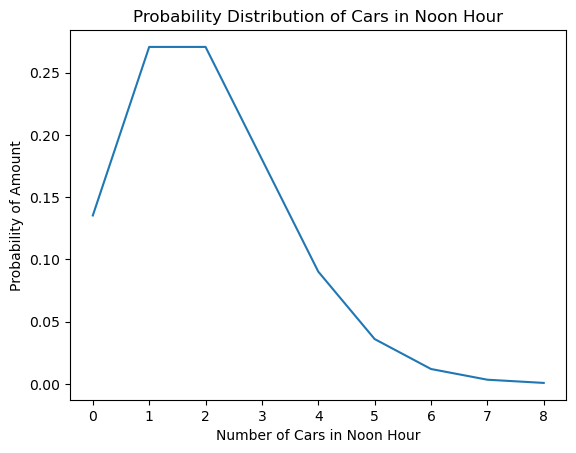

In [217]:
x = np.arange(0,9)
y = [cars_in_hour.pmf(i) for i in x]
plt.plot(x, y)
plt.xlabel('Number of Cars in Noon Hour')
plt.ylabel('Probability of Amount')
plt.title('Probability Distribution of Cars in Noon Hour')
plt.show()

In [143]:
(cars == 0).mean()

0.1291

In [145]:
#What is the probability that no cars drive up in the noon hour?
print(f'simulated chance there are no cars in an hour\
 is: {(cars == 0).mean()}')
print(f'calculated chance there are no cars in an hour\
 is: {cars_in_hour.pmf(0)}') #inclusive of endpoint

simulated chance there are no cars in an hour is: 0.1291
calculated chance there are no cars in an hour is: 0.1353352832366127


In [146]:
#What is the probability that 3 or more cars come through the drive through?
print(f'simulated chance there are 3 or more in an hour\
 is: {(cars >= 3).mean()}')
print(f'calculated chance there are 3 or more cars in an hour\
 is: {cars_in_hour.sf(2)}') #exclusive of endpoint

simulated chance there are 3 or more in an hour is: 0.3253
calculated chance there are 3 or more cars in an hour is: 0.32332358381693654


In [147]:
#How likely is it that the drive through gets at least 1 car?
print(f'simulated chance there is at least 1 car in an hour\
 is: {(cars >= 1).mean()}')
print(f'calculated chance there is at least 1 car in an hour\
 is: {cars_in_hour.sf(0)}') #exclusive of endpoint

simulated chance there is at least 1 car in an hour is: 0.8709
calculated chance there is at least 1 car in an hour is: 0.8646647167633873


2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [154]:
grades = np.random.normal(3.0, 0.3, size=10_000)
grades.sort()

In [158]:
grades[-500]

3.496090838606028

In [18]:
μ = 3.0
σ = 0.3
gpa = stats.norm(μ, σ)

In [159]:
#What grade point average is required to be in the top 5% of the graduating class?
print(f'simulated gpa to be in the top 5% is: {grades[-500]}')
print(f'calculated gpa to be in top 5% is: {gpa.isf(0.05)}') #inclusive

simulated gpa to be in the top 5% is: 3.496090838606028
calculated gpa to be in top 5% is: 3.4934560880854417


In [160]:
#What GPA constitutes the bottom 15% of the class?
print(f'simulated gpa to be in the bottom 15% is: {grades[1500]}')
print(f'calculated gpa to be in bottom 15% is: {gpa.ppf(0.15)}')

simulated gpa to be in the top 5% is: 2.6931497854739046
calculated gpa to be in bottom 15% is: 2.689069983151863


In [244]:
#An eccentric alumnus left scholarship money for students in the third decile (bottom 30%)
# from the bottom of their class. Determine the range of the third decile. 
print(f'simulated gpa to be in the third decile is\
 between: {grades[2_000]} and {grades[3_000]}')
print(f'calculated gpa to be in third decile is\
 between: {gpa.ppf(0.2)} and {gpa.ppf(0.3)}')

simulated gpa to be in the third decile is between: 2.7497723499843905 and 2.8471183079111064
calculated gpa to be in third decile is between: 2.7475136299281258 and 2.842679846187588


Would a student with a 2.8 grade point average qualify for this scholarship?
- Yes, 2.7475 < 2.8 < 2.8426 so it would be within the bottom 30%, third decile

In [245]:
gpa.ppf(0.2) < 2.8 < gpa.ppf(0.3)

True

In [167]:
#If I have a GPA of 3.5, what percentile am I in?

print(f'simulated percentile with 3.5 gpa\
 is: {(10_000 - len(grades[grades >= 3.5])) / 10_000}')
print(f'calculated percentile with gpa of 3.5 is: {gpa.cdf(3.5)}')

simulated percentile with 3.5 gpa is: 0.9511
calculated percentile with gpa of 3.5 is: 0.9522096477271853


3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [169]:
n = 4326
p = 0.02

clicks = np.random.binomial(n, p, size = 10_000)

In [171]:
(clicks >= 97).mean()

0.1371

In [22]:
# binomial distribution
click_thru = stats.binom(4326, 0.02)

In [172]:
#How likely is it that this many people (97) or more click through?
# prob of value or above is survival function
print(f'simulated chance to get at least 97 click throughs is: {(clicks >= 97).mean()}')
print(f'calculated chance to get at least 97\
 click throughs is: {click_thru.sf(96)}') #endpoint exclusive

simulated chance to get at least 97 click throughs is: 0.1371
calculated chance to get at least 97 click throughs is: 0.13975823631416445


4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?

In [225]:
questions = 60
p = 0.01
answers = np.random.randint(0, 100, size = (10000, 60))

In [238]:
((answers == 0).sum(axis=1) >= 1).mean()

0.4444

In [240]:
# What is the probability that at least one of your first 60 answers is correct?
n = 60
p = 0.01
first_sixty = stats.binom(n, p)
#prob of given value or above is sf
print(f'simulated chance to have at least 1 correct answer in the\
 first 60 is: {((answers == 0).sum(axis=1) >= 1).mean()}')
print(f'calculated chance to have at least 1 correct answer in the\
 first 60 is: {first_sixty.sf(0)}') #endpoint exclusive

simulated chance to have at least 1 correct answer in the first 60 is: 0.4444
calculated chance to have at least 1 correct answer in the first 60 is: 0.45284335760923855


5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
- How likely is it that the break area gets cleaned up each day? 
- How likely is it that it goes two days without getting cleaned up? 
- All week?

In [125]:
# number of students per day is binomial with 66 trials, @ 90% success rate
# simulate number of students every day for 10_000 days
students_per_day = stats.binom(66, .9).rvs(
    10_000).astype(int)  # 59.4 calculated avg
students_per_day

array([62, 62, 62, ..., 57, 58, 61])

In [128]:
# simulate if the breakroom has been cleaned by any of the simulated
# students (0.03 chance of cleaning by any 1 student) in the 10_000 days
cleaners_per_day = [(np.random.choice([0,1], size=(students), p=[0.97, 0.03])) 
           for students in students_per_day]
cleaners_per_day

[array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0,

In [136]:
# determine if the breakroom has been cleaned by any simulated students in the 10_000 days
# if anyone has cleaned on a given day, this will return 1, else 0
clean_day = []
for day in cleaners_per_day:
    if day.sum():
        clean_day.append(1)
    else:
        clean_day.append(0)
clean_day = np.array(clean_day)

In [152]:
clean_day.shape

(10000,)

In [140]:
# How likely is it that the break area gets cleaned up on any given day?
# chance of success for each student is 0.03
p = 0.03
print(f'simulated chance that the break area gets cleaned on any given day\
 is: {clean_day.mean()}')
chance_cleaned_per_day = stats.binom(59, p).sf(0)
print(f'calculated chance that the break area gets cleaned on any given day \
is: {chance_cleaned_per_day}')

simulated chance that the break area gets cleaned on any given day is: 0.8342
calculated chance that the break area gets cleaned on any given day is: 0.8342199288437352


In [160]:
sim_2_clean_days = clean_day.reshape(5000, 2).sum(axis=1)
sim_2_clean_days.shape
sim_2

(5000,)

In [163]:
not_clean_2_days = []
for day in sim_2_clean_days:
    if day.sum():
        not_clean_2_days.append(0)
    else:
        not_clean_2_days.append(1)
not_clean_2_days = np.array(not_clean_2_days)
not_clean_2_days.mean()

0.0266

In [164]:
# How likely is it that it goes two days without getting cleaned up?
sim_2_clean_days = clean_day.reshape(5000, 2).sum(axis=1)
print(f'simulated chance that the break area does not get cleaned for 2 days\
 is: {not_clean_2_days.mean()}')
p = 0.03
not_clean_2_days = (1 - stats.binom(59, p).sf(0)) ** 2
print(f'calculated chance that the break area does not get cleaned for 2 days \
is: {np.prod(not_clean_2_days)}')

simulated chance that the break area gets cleaned on any given day is: 0.0266
calculated chance that the break area does not get cleaned for 2 days is: 0.027483031992576224


In [175]:
sim_5_clean_days = clean_day.reshape(2000, 5).sum(axis=1)
sim_5_clean_days.shape

(2000,)

In [177]:
not_clean_5_days = []
for day in sim_5_clean_days:
    if day.sum():
        not_clean_5_days.append(0)
    else:
        not_clean_5_days.append(1)
not_clean_5_days = np.array(not_clean_5_days)
not_clean_5_days.mean()

0.0

In [174]:
# How likely is it that it goes all week without getting cleaned up?

print(f'simulated chance that the break area does not get cleaned for 5 days\
 is: {not_clean_5_days.mean()}')

p = 0.03
not_clean_5_days = (1 - stats.binom(59, p).sf(0)) ** 5
print(f'calculated chance that the break area does not get cleaned all week \
is: {not_clean_5_days}')

simulated chance that the break area does not get cleaned for 5 days is: 0.0
calculated chance that the break area does not get cleaned all week is: 0.00012521651388091348


6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [264]:
# amount of people in line is mean 15 stddev 3
# multiply each person in line by 2 minutes
# 60 minutes to start with, minus 10 to get food, 2 mins to order own food
# find chance that have >= 15 minutes to eat
time = 60 - 10 - 15 - 2
max_people = (time / 2) #minus 1 for our own order, and minus .5 since no half people
#chance that there are less than max people in line = cdf
people_in_line = stats.norm(15,3).cdf(max_people)
print(f'calculated chance that you can get food in time is: {people_in_line}')

calculated chance that you can get food in time is: 0.6914624612740131


In [261]:
μ = 15 * 2
σ = 3 * 2
lunch_distro = stats.norm(μ, σ)

In [262]:
60-15-10-2

33

In [263]:
#prob of taking 33 mins or less before I get to order
lunch_distro.cdf(33)

0.6914624612740131

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [91]:
import env

In [92]:
connection = env.get_db_url('employees')

In [95]:
query = '''
SELECT 
    AVG(salary)
FROM salaries
WHERE to_date > now();
'''
avg_salary = pd.read_sql(query, connection)

In [96]:
query = '''
SELECT 
    STDDEV(salary)
FROM salaries
WHERE to_date > now();
'''
stddev_salary = pd.read_sql(query, connection)

In [108]:
query = '''
SELECT 
    *
FROM salaries
WHERE to_date > now();
'''
df = pd.read_sql(query, connection)

In [106]:
avg_salary = avg_salary.iloc[0][0]
stddev_salary = stddev_salary.iloc[0][0]

In [267]:
# What percent of employees earn less than 60,000?
less_than_60k = stats.norm(avg_salary, stddev_salary).cdf(60_000)
print(f'calculated percent of employees making less than 60,000 is: {less_than_60k * 100}')

actual_less_than_60k = len(df[df.salary < 60_000]) / len(df)
print(f'actual percent of employees making less than 60,000 is: {actual_less_than_60k * 100}')

calculated percent of employees making less than 60,000 is: 24.38569709201618
actual percent of employees making less than 60,000 is: 27.05727041028802


In [266]:
#What percent of employees earn more than 95,000?
more_than_95k = stats.norm(avg_salary, stddev_salary).sf(95_000)
print(f'calculated percent of employees making more than 95,000 is: {more_than_95k * 100}')

actual_more_than_95k = len(df[df.salary > 95_000]) / len(df)
print(f'actual percent of employees making more than 95,000 is: {actual_more_than_95k * 100}')

calculated percent of employees making more than 95,000 is: 9.208773564924776
actual percent of employees making more than 95,000 is: 10.86272092752078


In [265]:
# What percent of employees earn between 65,000 and 80,000?
between_65_80k = (stats.norm(avg_salary, stddev_salary).cdf(80_000) 
                  - stats.norm(avg_salary, stddev_salary).cdf(65_000)) 
print(f'calculated percent of employees making between 65,000 \
and 80,000 is: {between_65_80k * 100}')

actual_between_65_80k = len(df[(65_000 < df.salary) & (df.salary < 80_000)]) / len(df)
print(f'actual percent of employees making between 65,000 \
and 80,000 is: {actual_between_65_80k * 100}')

calculated percent of employees making between 65,000 and 80,000 is: 33.50612231883823
actual percent of employees making between 65,000 and 80,000 is: 32.5107028035515


In [174]:
# len(df.salary.sort_values(ascending=False)) * .05
#12006 entries in top 5 percent
df.salary.sort_values(ascending=False)[:12006].min()

104228

In [133]:
# What do the top 5% of employees make?
top_5 = stats.norm(avg_salary, stddev_salary).isf(.05)
print(f'calculated salary to be in the top 5% is: {top_5}')

actual_top_5 = df.salary.sort_values(ascending=False)[:12006].min()
print(f'actual salary to be in top 5% is: {actual_top_5}')

calculated salary to be in the top 5% is: 100484.58529677246
actual salary to be in top 5% is: 104228
